# EXPLORATORY DATA ANALYSIS

IMPORT LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

LOAD DATASET

In [3]:
dataset = pd.read_excel("C:\\Users\\harsh\\Desktop\\ANZ synthesised transaction dataset.xlsx")

In [4]:
dataset.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


EXPLORE THE DATASET

In [5]:
dataset.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

In [6]:
dataset.isnull()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,False,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038,False,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
12039,False,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
12040,False,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
12041,False,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


DELETE THE IRRELEVANT COLUMNS

In [7]:
dataset = dataset[["status","card_present_flag","account","balance","date",
                   "gender","currency","age","merchant_suburb","txn_description","merchant_state",
                   "amount","country","customer_id","movement"]]
dataset["date"] = pd.to_datetime(dataset["date"])
dataset.head()

,status,card_present_flag,account,balance,date,gender,currency,age,merchant_suburb,txn_description,merchant_state,amount,country,customer_id,movement
0,authorized,1.0,ACC-1598451071,35.39,2018-08-01,F,AUD,26,Ashmore,POS,QLD,16.25,Australia,CUS-2487424745,debit
1,authorized,0.0,ACC-1598451071,21.20,2018-08-01,F,AUD,26,Sydney,SALES-POS,NSW,14.19,Australia,CUS-2487424745,debit
2,authorized,1.0,ACC-1222300524,5.71,2018-08-01,M,AUD,38,Sydney,POS,NSW,6.42,Australia,CUS-2142601169,debit
3,authorized,1.0,ACC-1037050564,2117.22,2018-08-01,F,AUD,40,Buderim,SALES-POS,QLD,40.90,Australia,CUS-1614226872,debit
4,authorized,1.0,ACC-1598451071,17.95,2018-08-01,F,AUD,26,Mermaid Beach,SALES-POS,QLD,3.25,Australia,CUS-2487424745,debit


In [8]:
dataset['account'].nunique()

100

AVERAGE TRANSACTION

In [9]:
dataset["date"].value_counts() #total number of transaction made on each day

2018-09-28    174
2018-08-17    172
2018-10-05    168
2018-10-17    162
2018-09-14    161
             ... 
2018-08-06     99
2018-08-20     97
2018-10-23     96
2018-10-08     95
2018-10-30     89
Name: date, Length: 91, dtype: int64

In [10]:
dataset["customer_id"].value_counts()  #total number of transaction made from each each customer

CUS-2487424745    578
CUS-2142601169    303
CUS-3026014945    292
CUS-3378712515    260
CUS-1614226872    259
                 ... 
CUS-3395687666     40
CUS-3201519139     37
CUS-1646183815     34
CUS-495599312      31
CUS-1739931018     25
Name: customer_id, Length: 100, dtype: int64

In [11]:
dataset_date_mean = dataset.groupby("date").mean()

In [12]:
dataset_date_mean

,card_present_flag,balance,age,amount
date,,,,
2018-08-01,0.750000,9933.975328,30.233577,218.014161
2018-08-02,0.858586,13963.617895,31.493421,143.331053
2018-08-03,0.797980,10187.786688,31.751592,242.653376
2018-08-04,0.787234,8206.809407,31.033898,53.356356
2018-08-05,0.739726,13297.525400,29.910000,44.265000
...,...,...,...,...
2018-10-27,0.801980,17025.213741,31.194245,50.155252
2018-10-28,0.772277,15298.837483,30.258741,59.007762
2018-10-29,0.746032,20863.967843,29.460784,377.932745


In [13]:
x = dataset_date_mean["amount"]
y = dataset["date"].value_counts()
avg_transaction_per_day = x/y

In [14]:
avg_transaction_per_day

2018-08-01    1.591344
2018-08-02    0.942967
2018-08-03    1.545563
2018-08-04    0.452173
2018-08-05    0.442650
                ...   
2018-10-27    0.360829
2018-10-28    0.412642
2018-10-29    3.705223
2018-10-30    2.785297
2018-10-31    1.104931
Length: 91, dtype: float64

In [15]:
dataset_date_count = dataset.groupby("date").count()
trans_vol = dataset_date_count["customer_id"].mean()
trans_vol
trans_amt = dataset_date_mean["amount"].mean()
trans_amt

190.61056774083966

In [16]:
dataset_date_count = dataset.groupby("date").count()
dataset_date_count

,status,card_present_flag,account,balance,gender,currency,age,merchant_suburb,merchant_state,amount,country,customer_id,movement
date,,,,,,,,,,,,,
2018-08-01,137,84,137,137,137,137,137,84,84,137,137,137,137
2018-08-02,152,99,152,152,152,152,152,99,99,152,152,152,152
2018-08-03,157,99,157,157,157,157,157,99,99,157,157,157,157
2018-08-04,118,94,118,118,118,118,118,94,94,118,118,118,118
2018-08-05,100,73,100,100,100,100,100,73,73,100,100,100,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-10-27,139,101,139,139,139,139,139,101,101,139,139,139,139
2018-10-28,143,101,143,143,143,143,143,101,101,143,143,143,143
2018-10-29,102,63,102,102,102,102,102,63,63,102,102,102,102


In [17]:
n_points = len(dataset_date_count.index)

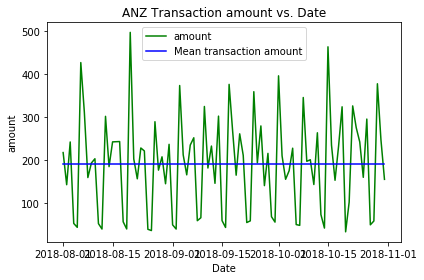

In [18]:
plt.figure()
plt.plot(dataset_date_count.index, dataset_date_mean["amount"], c="green", label = "amount")
plt.plot(dataset_date_count.index, np.linspace(trans_amt,trans_amt,n_points), c="blue", label = "Mean transaction amount")
plt.title("ANZ Transaction amount vs. Date")
plt.xlabel("Date")
plt.ylabel("amount")
plt.legend()
plt.tight_layout()

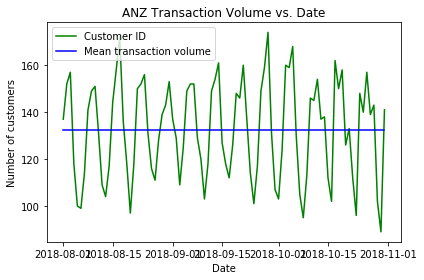

In [19]:
plt.figure()
plt.plot(dataset_date_count.index, dataset_date_count["customer_id"], c="green", label = "Customer ID")
plt.plot(dataset_date_count.index, np.linspace(trans_vol,trans_vol,n_points), c="blue", label = "Mean transaction volume")
plt.title("ANZ Transaction Volume vs. Date")
plt.xlabel("Date")
plt.ylabel("Number of customers")
plt.legend()
plt.tight_layout()

AMOUNT FOR EACH AGE

In [20]:
dataset["country"].value_counts()

Australia    12043
Name: country, dtype: int64

In [21]:
X = dataset.groupby("age").mean()

In [23]:
X

,card_present_flag,balance,amount
age,,,
18,0.807692,5849.617240,179.060271
19,0.806683,14736.986219,210.754286
20,0.807547,5933.973373,152.838471
21,0.815287,10224.733111,200.898963
22,0.804444,14847.271905,260.258170
23,0.792857,9203.373657,250.921942
24,0.822581,7768.554358,104.221571
25,0.834239,5538.414893,153.128427
26,0.798859,3351.659619,98.939406


In [32]:
X["amount"].count

<bound method Series.count of age
18    179.060271
19    210.754286
20    152.838471
21    200.898963
22    260.258170
23    250.921942
24    104.221571
25    153.128427
26     98.939406
27    141.127156
28    185.970314
29    274.523358
30    182.259419
31    165.635098
33    164.179137
34    189.236108
35    300.101667
37    130.489420
38    181.984211
39    214.446855
40    229.531932
41    154.992231
42    317.231595
43    196.666554
44    210.052813
46    258.930000
47    211.213636
50    307.334318
52    418.742468
53    222.862603
64    120.311591
69    183.139412
78    318.977941
Name: amount, dtype: float64>

In [35]:
dataset["age"].nunique

<bound method IndexOpsMixin.nunique of 0        26
1        26
2        38
3        40
4        26
         ..
12038    30
12039    20
12040    28
12041    69
12042    31
Name: age, Length: 12043, dtype: int64>